# Biyolojide Makine Öğrenmesi

## Hafta 4: Keşif Amaçlı Veri Analizi ve Veri Görselleştirme

**Doç. Dr. Murat Gezer**



### Amaçlar:
- Keşif amaçlı veri analizinin temel prensiplerini öğrenmek
- Biyolojik veri setlerini analiz etmek için gerekli Python kütüphanelerini tanımak
- Veri görselleştirme tekniklerini biyolojik sorulara uygulamak
- Veri temizleme ve ön işleme adımlarını anlamak
- Basit istatistiksel analizleri yorumlamak

### İçerik:
1. Giriş ve Gerekli Kütüphaneler
2. Veri Yükleme ve İnceleme
3. Veri Temizleme ve Ön İşleme
4. Temel İstatistiksel Analizler
5. Veri Görselleştirme Teknikleri
6. Çok Değişkenli Veri Analizi
7. Biyolojik Verilerde Örüntü Keşfi
8. Pratik Uygulamalar ve Örnek Çalışma

Haydi başlayalım!

## 1. Giriş ve Gerekli Kütüphaneler

Keşif amaçlı veri analizi (EDA), veri setini anlamak, ana özelliklerini özetlemek, önemli değişkenleri belirlemek ve olası anormalliklerini tespit etmek için kullanılan bir yaklaşımdır. Biyolojik araştırmalarda EDA, deneylerden elde edilen ham verileri anlamlandırmada ve hipotezleri test etmek için hazırlık yapmada kritik bir rol oynar.

### Neden EDA Önemlidir?

Biyolojik veriler genellikle:
- Çok değişkenlidir (genler, proteinler, metabolitler, vb.)
- Gürültülüdür (biyolojik ve teknik varyasyon içerir)
- Eksik değerler içerebilir
- Doğrusal olmayan ilişkiler gösterebilir
- Yüksek boyutludur (omik veriler gibi)

EDA, bu karmaşık verileri daha iyi anlamanıza, hipotezler geliştirmenize ve sağlam analizler için temel oluşturmanıza yardımcı olur.



### Python'da EDA için Temel Kütüphaneler

Python, veri analizi ve görselleştirme için çeşitli güçlü kütüphaneler sunar. 
Bunlardan en temel olanlar:

In [4]:
# Temel kütüphanelerin yüklenmesi
import numpy as np              # Sayısal hesaplamalar için
import pandas as pd             # Veri manipülasyonu ve analizi için
import matplotlib.pyplot as plt # Temel görselleştirme kütüphanesi
import seaborn as sns           # İstatistiksel veri görselleştirme
from scipy import stats         # İstatistiksel testler ve fonksiyonlar için

# Görselleştirmelerin daha iyi görünmesi için ayarlar
# Eski: plt.style.use('seaborn-whitegrid')
# Yeni seçeneklerden birini kullanabilirsiniz:

# Seçenek 1: Geriye uyumluluk için v0_8 önekini ekleyin
plt.style.use('seaborn-v0_8-whitegrid')  

# VEYA Seçenek 2: Doğrudan Seaborn ayarını kullanın
# sns.set_style('whitegrid')

sns.set(font_scale=1.2)         # Yazı boyutlarını arttır
plt.rcParams['figure.figsize'] = (12, 8)  # Varsayılan şekil boyutu

# Çalışma notebookunun içinde çizimlerin görüntülenmesi için
%matplotlib inline

# Pandas'ta tam veri çerçevesinin görüntülenmesi için
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Uyarıları görmezden gelmek için (isteğe bağlı)
import warnings
warnings.filterwarnings('ignore')

print("Kütüphaneler başarıyla yüklendi!")

Kütüphaneler başarıyla yüklendi!


### Her Kütüphanenin Rolü

- **NumPy**: Bilimsel hesaplamalar için temel kütüphanedir. Çok boyutlu diziler, matematiksel fonksiyonlar ve rastgele sayı üretimi gibi işlevler sunar.

- **Pandas**: Veri analizi için en popüler Python kütüphanesidir. Tablo benzeri veri yapıları, veri temizleme, filtreleme ve dönüştürme gibi işlevler sunar.

- **Matplotlib**: Python'un temel çizim kütüphanesidir. Çizgi grafikleri, histogramlar, dağılım grafikleri gibi temel görselleştirmeler için kullanılır.

- **Seaborn**: Matplotlib üzerine kurulmuş, istatistiksel görselleştirme odaklı bir kütüphanedir. Daha estetik ve bilgilendirici grafikler oluşturmayı kolaylaştırır.

- **SciPy**: Bilimsel ve teknik hesaplamalar için kullanılan kütüphanedir. İstatistiksel testler, optimizasyon ve sinyal işleme gibi fonksiyonlar içerir.


## 2. Veri Yükleme ve İnceleme

Biyolojik veri setleri genellikle CSV, Excel, TSV veya daha özel formatlar (FASTA, FASTQ, VCF vb.) şeklinde gelir. Bu derste, biyolojik veri analizine uygun, açık kaynaklı bir veri seti kullanacağız.

### Örnek Veri Seti: Iris Dataset (Süsen Çiçeği Veri Seti)

Başlangıç için, biyolojide de sıklıkla kullanılan bir klasik veri seti olan Iris veri setini kullanacağız. Bu veri seti, Sir Ronald Fisher tarafından 1936'da tanıtılmış ve üç farklı süsen çiçeği türünün ölçümlerini içerir. Bu basit ama etkili bir örnek olarak işimizi görecektir.

In [6]:
# Iris veri setini yükleyelim
from sklearn.datasets import load_iris

# Veri setini yükle
iris = load_iris()

# Veriyi bir pandas DataFrame'e dönüştürelim
# Bu şekilde daha kolay işlenebilir ve görselleştirilebilir
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Hedef değişkeni (tür) ekleyelim
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Veri setinin ilk birkaç satırını görelim
print("Veri setinin boyutu:", iris_df.shape)
print("\nVeri setinin ilk 5 satırı:")
iris_df

Veri setinin boyutu: (150, 5)

Veri setinin ilk 5 satırı:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Veri Seti Hakkında Genel Bilgiler**

Iris veri seti 150 örnek içerir ve her örnek için 4 özellik ölçülmüştür:

1. **sepal length (cm)**: Çanak yaprak uzunluğu
2. **sepal width (cm)**: Çanak yaprak genişliği
3. **petal length (cm)**: Taç yaprak uzunluğu
4. **petal width (cm)**: Taç yaprak genişliği

Bu örnekler üç farklı süsen çiçeği türüne (setosa, versicolor, virginica) aittir. 



### Veri Setini Tanıma

Veri setimizin genel yapısını anlamak için bazı temel keşif işlemleri yapalım:

In [7]:
# Veri setinin yapısını inceleyelim
print("Veri seti bilgisi:")
iris_df.info()

Veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [10]:
# Türlerin dağılımına bakalım
print("Türlerin dağılımı:")
iris_df['species'].value_counts()

Türlerin dağılımı:


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
# İstatistiksel özet
print("Sayısal değişkenlerin özet istatistikleri:")
iris_df.describe()

Sayısal değişkenlerin özet istatistikleri:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Veri Yorumlama

Yukarıdaki temel incelemelerden şunları söyleyebiliriz:

- Veri setimizde eksik değer (NaN) yok
- Her tür için eşit sayıda örnek var (her biri 50 adet)
- Sayısal özellikler farklı aralıklarda değerler alıyor, örneğin taç yaprak genişliği daha dar bir aralıkta (0.1-2.5 cm) iken çanak yaprak uzunluğu daha geniş bir aralıkta (4.3-7.9 cm)
- Bazı özellikler daha yüksek varyansa sahip

## 3. Veri Temizleme ve Ön İşleme

Veri temizleme ve ön işleme, analizin en önemli adımlarından biridir. Biyolojik veriler genellikle eksik değerler, aykırı değerler (outliers) ve çeşitli gürültü türleri içerebilir. Bu problemleri ele almak, analizinizin güvenilirliğini artırır.

### Eksik Değerleri Kontrol Etme

İlk olarak, veri setimizdeki eksik değerleri (missing values) kontrol edelim:

In [12]:
# Eksik değerlerin kontrolü
print("Sütunlardaki eksik değer sayısı:")
iris_df.isnull().sum()

Sütunlardaki eksik değer sayısı:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Iris veri setinde eksik değer bulunmuyor, ancak gerçek dünya biyolojik verilerinde genellikle eksik değerler olur. Eksik değerleri ele almanın birkaç yolu vardır:

1. **Eksik değerleri içeren satırları silmek**: Eğer eksik değerler az sayıdaysa, bu satırları tamamen çıkarabilirsiniz.
2. **Eksik değerleri ortalama, medyan veya mod ile doldurmak**: Sayısal değişkenler için genellikle ortalama veya medyan, kategorik değişkenler için mod kullanılır.
3. **İleri doldurma (imputation) yöntemleri kullanmak**: KNN, regresyon veya makine öğrenimi tabanlı doldurma teknikleri.

Biyolojik verilerde eksik değerlerin doldurulması için örnek bir kod parçası (iris veri setinde eksik değer yok, ancak gerçek verilerde kullanabilirsiniz):

In [ ]:
# Eksik değerlerin doldurulması örneği (bu örnekte uygulanmıyor)
def handle_missing_values(df):
    # Sayısal kolonlardaki eksik değerleri medyan ile doldur
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    
    # Kategorik kolonlardaki eksik değerleri mod (en sık değer) ile doldur
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    return df

# Örnek kullanım (burada çalıştırmıyoruz çünkü iris veri setinde eksik değer yok)
#iris_df = handle_missing_values(iris_df.copy())

### Aykırı Değerler (Outliers)

Aykırı değerler, veri setimizdeki genel eğilimden önemli ölçüde sapan değerlerdir. Biyolojik verilerde aykırı değerler, teknik hatalardan kaynaklanabildiği gibi, gerçek biyolojik varyasyonu da temsil edebilir.

Aykırı değerleri tespit etmenin birkaç yolu vardır:

1. **Görsel yöntemler**: Box plot (kutu grafiği), scatter plot (dağılım grafiği) gibi
2. **İstatistiksel yöntemler**: Z-skoru, IQR (Çeyrekler arası aralık) yöntemi

Aykırı değerleri kutu grafikleriyle tespit edelim:

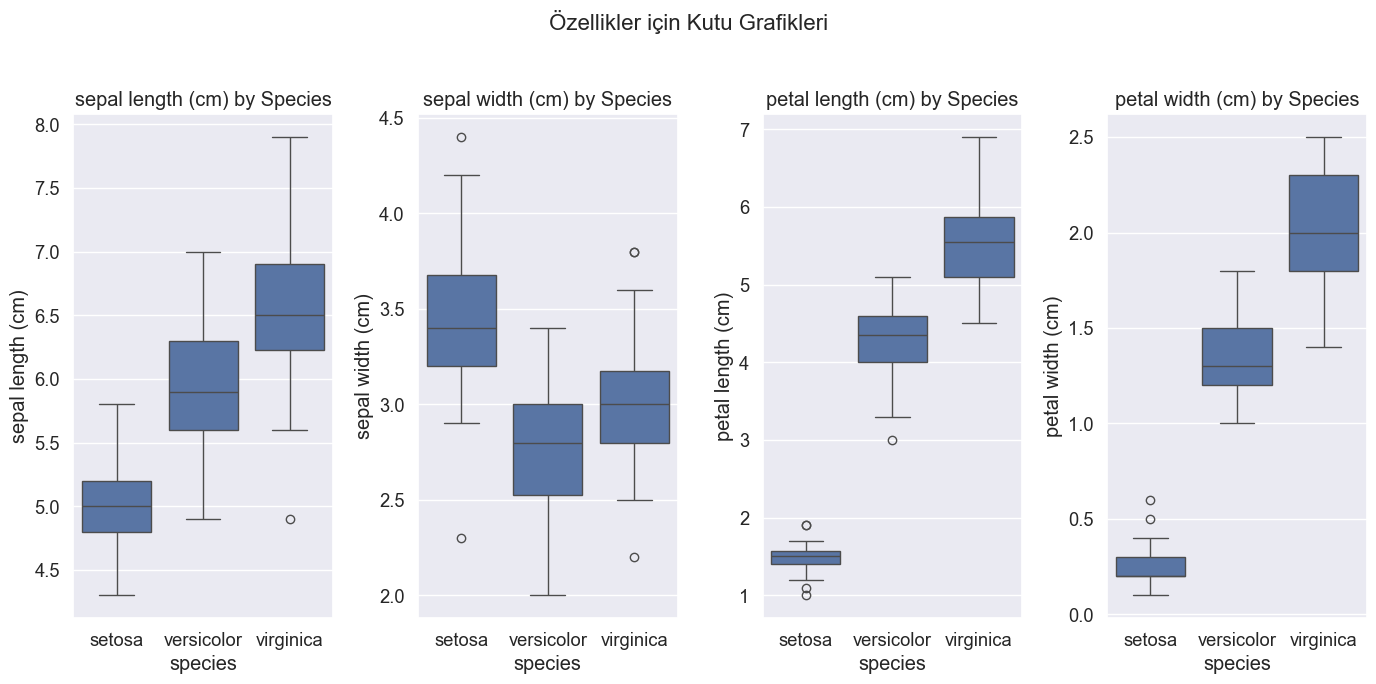

In [13]:
# Aykırı değerleri kutu grafiği ile görselleştirme
plt.figure(figsize=(14, 7))

# Her özellik için kutu grafiği çizme
for i, feature in enumerate(iris.feature_names):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=feature, x='species', data=iris_df)
    plt.title(f'{feature} by Species')
    plt.tight_layout()

plt.suptitle('Özellikler için Kutu Grafikleri', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitle için yer açma
plt.show()

Kutu grafiklerinde, kutudan uzakta görünen noktalar potansiyel aykırı değerler olarak kabul edilir. Görünüşe göre bazı türlerde örneğin setosa türünde taç yaprak genişliğinde birkaç aykırı değer olabilir.

Şimdi, Z-skoru yöntemini kullanarak aykırı değerleri daha sistematik bir şekilde tespit edelim:

In [16]:
# Z-skoru ile aykırı değerleri tespit etme
def detect_outliers_zscore(df, threshold=2):
    """Z-skoru yöntemi ile aykırı değerleri tespit eder"""
    outliers = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        z_scores = np.abs(stats.zscore(df[col]))
        outlier_indices = np.where(z_scores > threshold)[0]
        if len(outlier_indices) > 0:
            outliers[col] = outlier_indices
    
    return outliers

# Aykırı değerleri tespit et
outliers = detect_outliers_zscore(iris_df.iloc[:, :-1])  # Son sütunu (species) hariç tutuyoruz

print("Z-skoru yöntemi ile tespit edilen aykırı değerler:")
for feature, indices in outliers.items():
    print(f"{feature}: {len(indices)} adet aykırı değer")
    if len(indices) > 0:
        print(f"Örnek aykırı değerler: {iris_df.loc[indices, [feature, 'species']].head(3)}")
    print("")

Z-skoru yöntemi ile tespit edilen aykırı değerler:
sepal length (cm): 6 adet aykırı değer
Örnek aykırı değerler:      sepal length (cm)    species
105                7.6  virginica
117                7.7  virginica
118                7.7  virginica

sepal width (cm): 5 adet aykırı değer
Örnek aykırı değerler:     sepal width (cm) species
14               4.0  setosa
15               4.4  setosa
32               4.1  setosa



### Normalizasyon ve Standardizasyon

Biyolojik veriler genellikle farklı ölçeklerde gelir (örneğin, gen ekspresyon seviyeleri ve metabolit konsantrasyonları). Bu durum, bazı makine öğrenmesi algoritmalarının performansını etkileyebilir. Bu nedenle, verilerinizi normalize etmek veya standardize etmek genellikle iyi bir fikirdir.

- **Normalizasyon**: Değerleri genellikle [0,1] aralığına dönüştürür (Min-Max Scaling)
- **Standardizasyon**: Değerleri ortalama 0, standart sapma 1 olacak şekilde dönüştürür (Z-Score Standardization)

Iris veri setini standardize edelim:

In [18]:
# Veriyi standardize etme (Z-score standardizasyonu)
from sklearn.preprocessing import StandardScaler

# Sadece sayısal özellikleri seçme (species sütununu hariç tutma)
features = iris_df.iloc[:, :-1]

# Standardizasyon işlemi
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Standardize edilmiş verileri DataFrame'e dönüştürme
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Türleri standardize edilmiş DataFrame'e ekleme
features_scaled_df['species'] = iris_df['species']

# Standardize edilmiş verilerin ilk birkaç satırını görüntüleme
print("Standardize edilmiş veriler:")
features_scaled_df

Standardize edilmiş veriler:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


In [19]:
# Standardize edilmiş verilerin özet istatistikleri
print("Standardize edilmiş verilerin özet istatistikleri:")
features_scaled_df.iloc[:, :-1].describe().round(2)

Standardize edilmiş verilerin özet istatistikleri:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


Standartlaştırma sonrasında, her özelliğin ortalaması 0 ve standart sapması 1'e yakındır. Bu, farklı ölçeklerdeki özelliklerin karşılaştırılabilir hale gelmesini sağlar.

## 4. Temel İstatistiksel Analizler

Biyolojik verilerin analizi genellikle temel istatistiksel yöntemlerle başlar. Bu, verilerin merkezi eğilimini, dağılımını ve değişkenler arasındaki ilişkileri anlamayı içerir.

### Merkezi Eğilim ve Dağılım Ölçüleri

Her tür için özelliklerin ortalama ve standart sapmalarını hesaplayalım:

In [20]:
# Her tür için ortalama ve standart sapma hesaplama
species_stats = iris_df.groupby('species').agg(['mean', 'std'])
print("Her tür için özellik istatistikleri:")
species_stats

Her tür için özellik istatistikleri:


sepal length (cm)           sepal width (cm)           petal length (cm)           petal width (cm)          
                        mean       std             mean       std              mean       std             mean       std
species                                                                                                                 
setosa                 5.006  0.352490            3.428  0.379064             1.462  0.173664            0.246  0.105386
versicolor             5.936  0.516171            2.770  0.313798             4.260  0.469911            1.326  0.197753
virginica              6.588  0.635880            2.974  0.322497             5.552  0.551895            2.026  0.274650

### Korelasyon Analizi

Korelasyon, iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü ölçer. Pearson korelasyon katsayısı, en yaygın kullanılan korelasyon metriğidir ve -1 ile 1 arasında değer alır.

- r ≈ 1: Güçlü pozitif korelasyon (bir değişken arttığında, diğeri de artar)
- r ≈ 0: Korelasyon yok (değişkenler birbirinden bağımsız)
- r ≈ -1: Güçlü negatif korelasyon (bir değişken arttığında, diğeri azalır)

Iris veri setindeki özelliklerin korelasyonunu hesaplayalım:

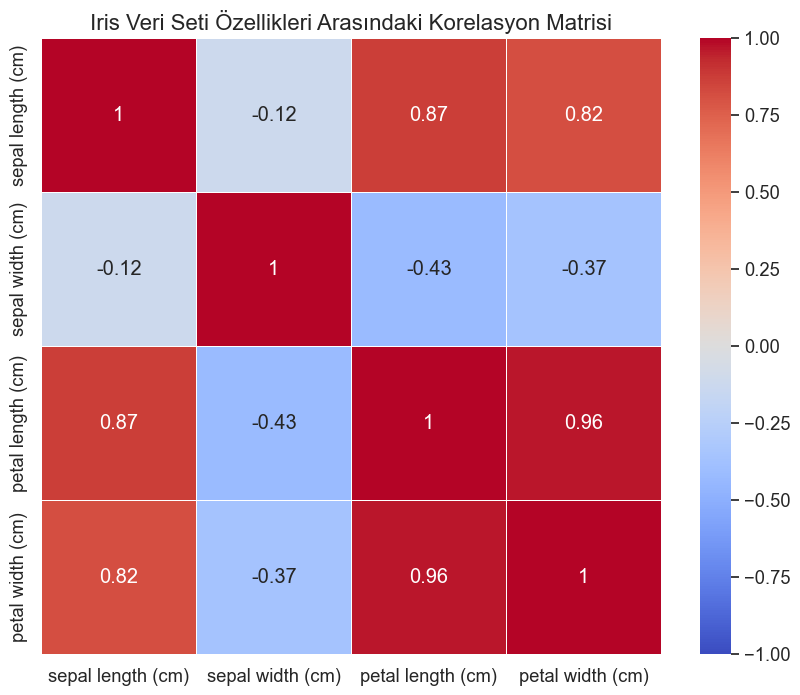

In [21]:
# Korelasyon matrisi hesaplama
correlation_matrix = iris_df.iloc[:, :-1].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Iris Veri Seti Özellikleri Arasındaki Korelasyon Matrisi', fontsize=16)
plt.show()

### Korelasyon Analizi Yorumu

Korelasyon matrisinden şu çıkarımları yapabiliriz:

- Taç yaprak uzunluğu ve taç yaprak genişliği arasında güçlü bir pozitif korelasyon var (0.96). Bu, taç yaprak uzunluğu arttıkça genişliğin de arttığı anlamına gelir.
- Taç yaprak uzunluğu ve çanak yaprak uzunluğu arasında da güçlü bir pozitif korelasyon var (0.87).
- Çanak yaprak genişliği diğer özelliklerle nispeten daha zayıf bir korelasyona sahip, hatta çanak yaprak uzunluğu ile negatif korelasyonlu (-0.11).

### İstatistiksel Testler

Biyolojik araştırmalarda, farklı gruplar arasında istatistiksel olarak anlamlı farklar olup olmadığını test etmek yaygındır. Örneğin, farklı süsen türleri arasında çanak yaprak uzunluğunun anlamlı şekilde farklı olup olmadığını test edelim.

Bunun için ANOVA testi kullanacağız:

In [22]:
# Tek yönlü ANOVA testi (One-way ANOVA)
from scipy.stats import f_oneway

# Her tür için çanak yaprak uzunluklarını ayıralım
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal_length = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# ANOVA testi uygulama
f_stat, p_value = f_oneway(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

print(f"ANOVA Testi Sonuçları:")
print(f"F-istatistiği: {f_stat:.4f}")
print(f"p-değeri: {p_value:.10f}")
print(f"Sonuç: {'İstatistiksel olarak anlamlı fark var' if p_value < 0.05 else 'Anlamlı fark yok'}")

ANOVA Testi Sonuçları:
F-istatistiği: 119.2645
p-değeri: 0.0000000000
Sonuç: İstatistiksel olarak anlamlı fark var


ANOVA testi sonucunda, p-değeri 0.05'ten çok küçük olduğu için, üç süsen türü arasında çanak yaprak uzunluğu açısından istatistiksel olarak anlamlı bir fark olduğunu söyleyebiliriz.

Ancak ANOVA testi yalnızca gruplar arasında bir fark olduğunu söyler, hangi grupların birbirinden farklı olduğunu belirtmez. Bu ayrımı yapmak için post-hoc testleri kullanabiliriz, örneğin Tukey HSD testi:

In [23]:
# Tukey HSD post-hoc testi
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey testi için veriyi hazırlama
tukey_data = iris_df['sepal length (cm)']
tukey_groups = iris_df['species']

# Tukey testini uygulama
tukey_result = pairwise_tukeyhsd(tukey_data, tukey_groups, alpha=0.05)

# Sonuçları görüntüleme
print("Tukey HSD Test Sonuçları:")
print(tukey_result)

Tukey HSD Test Sonuçları:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


Tukey testi sonucunda, tüm tür çiftleri arasında çanak yaprak uzunluğu açısından anlamlı farklar olduğunu görüyoruz (p-adj < 0.05).

## 5. Veri Görselleştirme Teknikleri

Veri görselleştirme, karmaşık biyolojik verileri anlama ve yorumlamada çok değerli bir araçtır. Farklı türdeki veriler için farklı görselleştirme yöntemleri uygundur.

### Tek Değişkenli Görselleştirmeler

Tek bir değişkenin dağılımını incelemek için histogram ve yoğunluk grafikleri kullanılabilir:

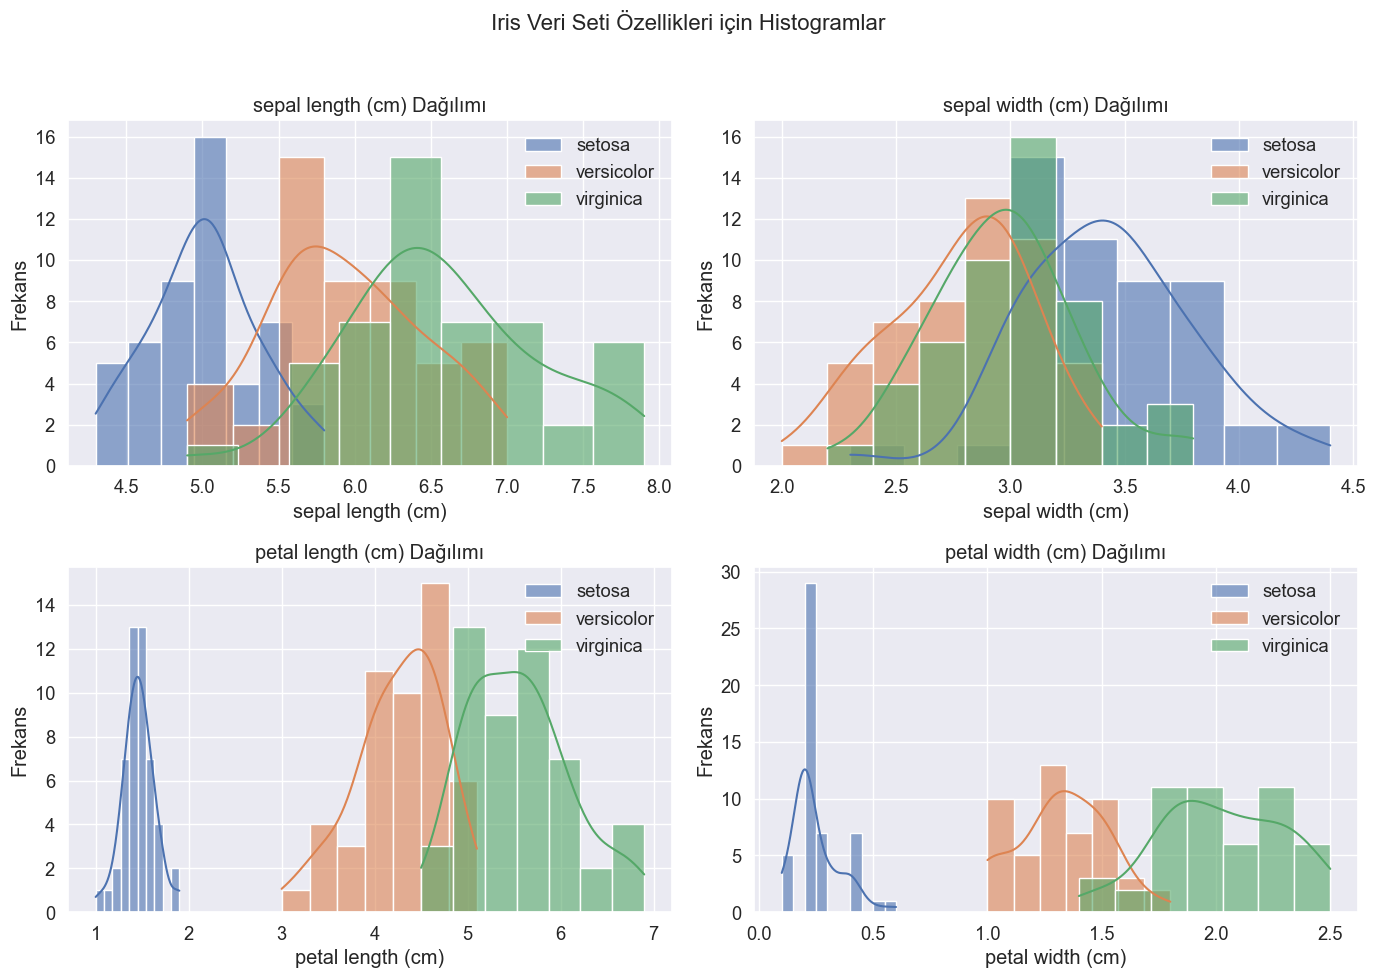

In [24]:
# Histogram ve yoğunluk grafikleri
plt.figure(figsize=(14, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    
    # Her tür için histogramlar
    for species in iris.target_names:
        sns.histplot(iris_df[iris_df['species'] == species][feature], kde=True, label=species, alpha=0.6)
    
    plt.title(f'{feature} Dağılımı')
    plt.xlabel(feature)
    plt.ylabel('Frekans')
    plt.legend()

plt.suptitle('Iris Veri Seti Özellikleri için Histogramlar', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### İki Değişkenli Görselleştirmeler

İki değişken arasındaki ilişkiyi incelemek için dağılım grafikleri (scatter plot) kullanılabilir:

<Figure size 1200x1200 with 0 Axes>

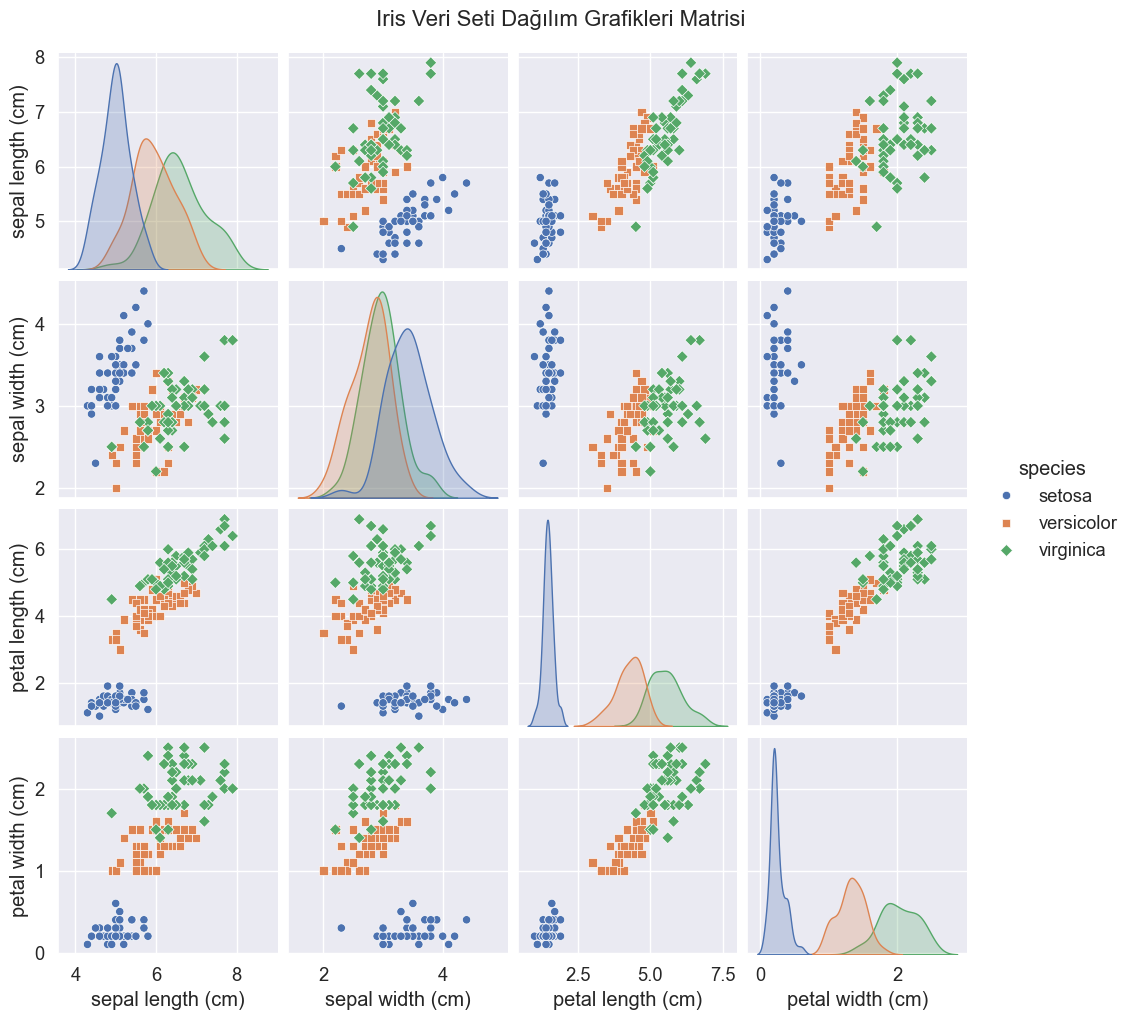

In [25]:
# Dağılım grafiği matrisi
plt.figure(figsize=(12, 12))
sns.pairplot(iris_df, hue='species', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle('Iris Veri Seti Dağılım Grafikleri Matrisi', fontsize=16, y=1.02)
plt.show()

### Çok Değişkenli Görselleştirmeler

Çok boyutlu verileri görselleştirmek daha zorlayıcıdır, ancak çeşitli teknikler mevcuttur. Paralel koordinat grafikleri, çok boyutlu verileri 2B'de görselleştirmenin etkili bir yoludur:

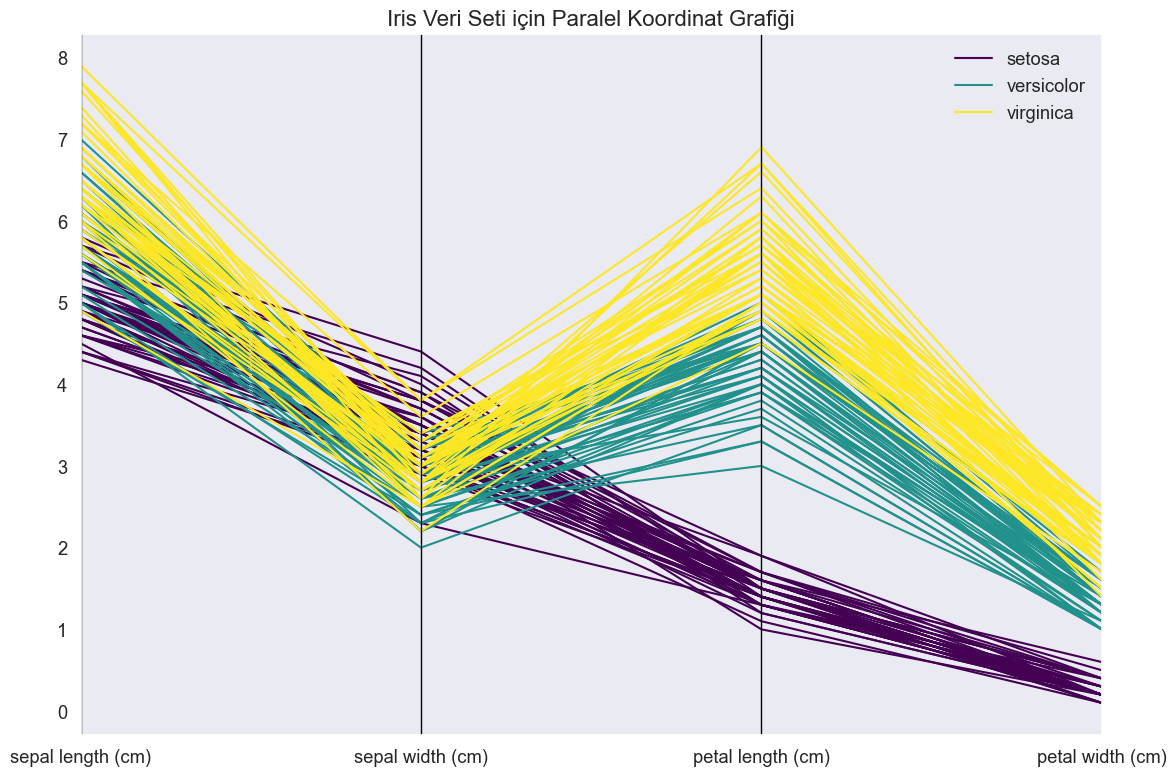

In [26]:
# Paralel koordinat grafiği
plt.figure(figsize=(12, 8))
from pandas.plotting import parallel_coordinates

# Paralel koordinat grafiği
parallel_coordinates(iris_df, 'species', colormap='viridis')
plt.title('Iris Veri Seti için Paralel Koordinat Grafiği', fontsize=16)
plt.tight_layout()
plt.show()

### Radar/Örümcek Grafikleri

Radar grafikleri, çok sayıda değişkeni görselleştirmek için kullanılabilir ve biyolojik verilerin karakterizasyonunda yararlıdır:

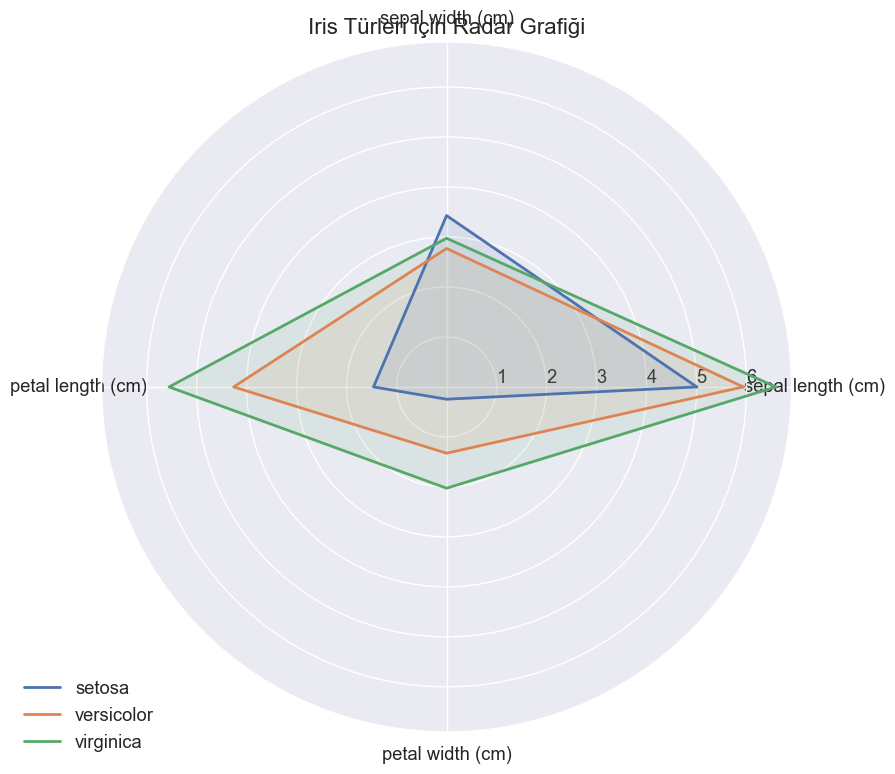

In [27]:
# Radar/Örümcek grafiği
from math import pi

# Her tür için ortalama değerleri hesaplama
species_means = iris_df.groupby('species').mean()

# Kategorileri ve her tür için değerleri hazırlama
categories = list(species_means.columns)
N = len(categories)

# Açıları hesaplama (360 dereceyi N eşit parçaya bölme)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Grafiği kapatmak için ilk açıyı tekrar ekleme

# Radar grafiği çizme
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, polar=True)

# Her tür için bir radar çizgisi çizme
for i, species in enumerate(species_means.index):
    values = species_means.loc[species].values.tolist()
    values += values[:1]  # Grafiği kapatmak için ilk değeri tekrar ekleme
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=species)
    ax.fill(angles, values, alpha=0.1)

# Grafik güzelleştirme
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Iris Türleri için Radar Grafiği', fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
# PCA uygulama
from sklearn.decomposition import PCA

# PCA modelini 2 bileşenle oluşturma
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris_df.iloc[:, :-1])

# PCA sonuçlarını bir DataFrame'e dönüştürme
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['species'] = iris_df['species']

# Açıklanan varyans oranı
print(f"PC1 tarafından açıklanan varyans: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"PC2 tarafından açıklanan varyans: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"Toplam açıklanan varyans: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")

PC1 tarafından açıklanan varyans: 0.9246 (92.46%)
PC2 tarafından açıklanan varyans: 0.0531 (5.31%)
Toplam açıklanan varyans: 0.9777 (97.77%)


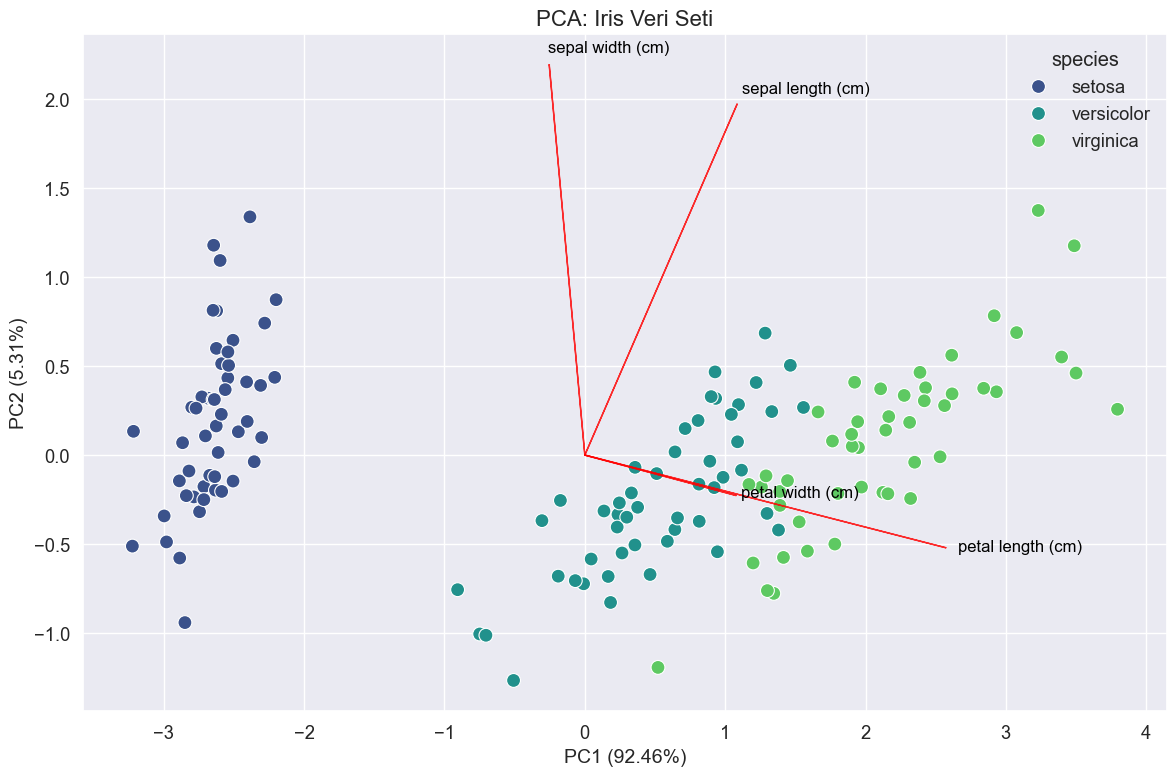

In [29]:
# PCA sonuçlarını görselleştirme
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, s=100, palette='viridis')

# Orijinal özelliklerin PCA üzerindeki yüklerini gösterme (bileşen ağırlıkları)
feature_names = iris_df.columns[:-1]
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3, color='red', alpha=0.8)
    plt.text(pca.components_[0, i]*3.1, pca.components_[1, i]*3.1, feature, color='black', fontsize=12)

plt.grid(True)
plt.title('PCA: Iris Veri Seti', fontsize=16)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=14)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=14)
plt.tight_layout()
plt.show()

PCA grafiğinden şu çıkarımları yapabiliriz:

- İlk iki temel bileşen (PC1 ve PC2), veri setindeki toplam varyasyonun yaklaşık %95.8'ini açıklıyor.
- Iris setosa türü, diğer iki türden net bir şekilde ayrılıyor.
- Iris versicolor ve Iris virginica türleri arasında biraz örtüşme var, ancak genel olarak ayrılabilir durumdalar.
- Taç yaprak uzunluğu ve genişliği, PC1 üzerinde güçlü pozitif yüklere sahip ve ayrımda önemli rol oynuyor.

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE, yüksek boyutlu verileri 2B veya 3B uzayda görselleştirmek için kullanılan bir boyut indirgeme tekniğidir. PCA'den farklı olarak, doğrusal olmayan yapıları korumaya odaklanır.

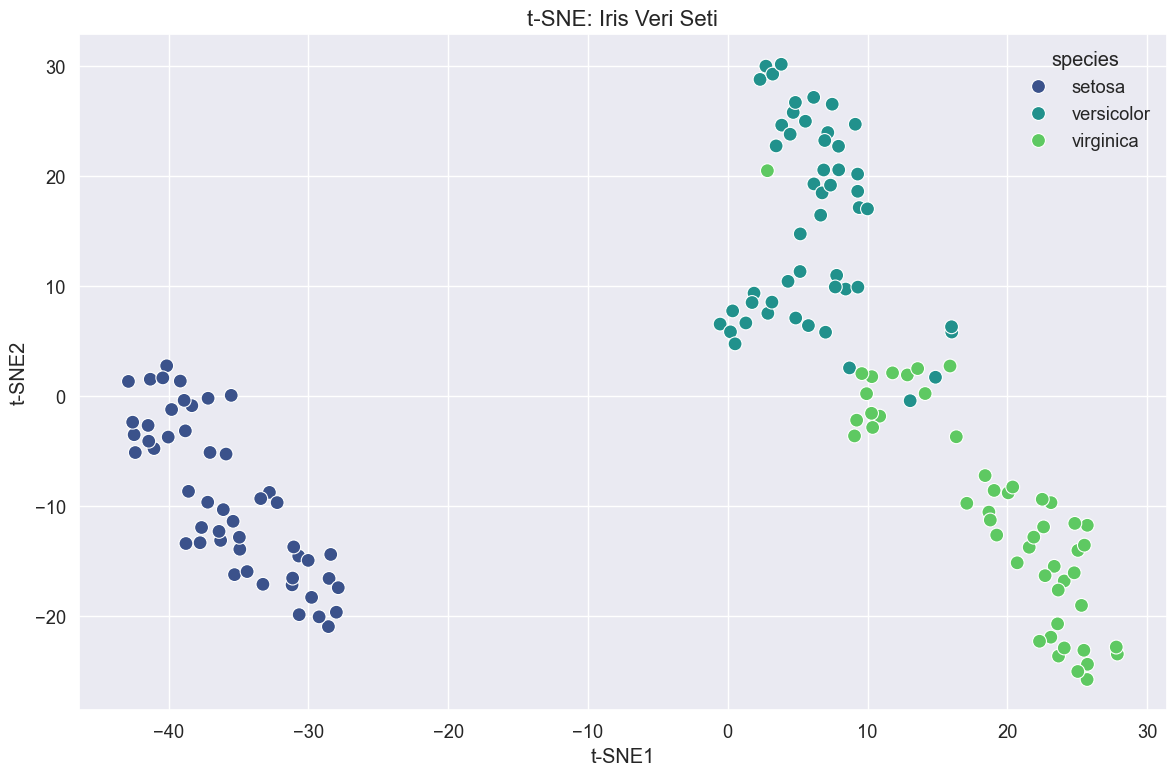

In [30]:
# t-SNE uygulama
from sklearn.manifold import TSNE

# t-SNE modelini oluşturma
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_result = tsne.fit_transform(iris_df.iloc[:, :-1])

# t-SNE sonuçlarını bir DataFrame'e dönüştürme
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['species'] = iris_df['species']

# t-SNE sonuçlarını görselleştirme
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='species', data=tsne_df, s=100, palette='viridis')
plt.title('t-SNE: Iris Veri Seti', fontsize=16)
plt.tight_layout()
plt.show()

t-SNE sonucunda, üç tür daha net bir şekilde ayrılmıştır. t-SNE, yerel komşuluk ilişkilerini korumaya odaklandığı için, PCA'den farklı olarak doğrusal olmayan ayrımları daha iyi yakalayabilir.



In [ ]:
# Gerçek biyolojik veri örneği - Gen ekspresyon verisi
# Genellikle bu veriler yüksek boyutlu ve karmaşıktır
# Basitlik için burada simüle edilmiş bir gen ekspresyon verisi kullanacağız

# Simüle gen ekspresyon verisi oluşturma
import numpy as np
np.random.seed(42)

# 100 gen ve 20 örnek için simüle edilmiş veri
n_genes = 100
n_samples = 20

# Gen ekspresyon matrisi oluşturma (gen ifadesi genellikle log2 dönüştürülmüş olur)
expression_data = np.random.normal(0, 1, (n_genes, n_samples))

# 2 farklı koşul simüle etme (örneğin, kontrol vs tedavi)
# İlk 10 örnek: Kontrol, Son 10 örnek: Tedavi
# Bazı genlerin ifadesini tedavi grubunda artıralım (diferansiyel ekspresyon)
differentially_expressed = np.random.choice(range(n_genes), size=20, replace=False)
expression_data[differentially_expressed, 10:] += np.random.normal(2, 0.5, (20, 10))

# Veriyi pandas DataFrame'e dönüştürme
gene_names = [f'Gene_{i+1}' for i in range(n_genes)]
sample_names = [f'Control_{i+1}' if i < 10 else f'Treatment_{i-9}' for i in range(n_samples)]

# Transpoz alıp örnekleri satırlara, genleri sütunlara yerleştiriyoruz
expression_df = pd.DataFrame(expression_data.T, columns=gene_names, index=sample_names)

# Verilerin bir kısmını gösterme
print("Simüle edilmiş gen ekspresyon verisinin boyutu:", expression_df.shape)
print("Veri örneği (ilk 5 örnek, ilk 5 gen):")
expression_df.iloc[:5, :5]

### Isı Haritası (Heatmap) ile Gen Ekspresyon Analizi

Isı haritaları, gen ekspresyon verilerini görselleştirmek için yaygın olarak kullanılır. Örnekler ve genler arasındaki ilişkileri renk kodlaması ile gösterir.

In [ ]:
# Gen ekspresyon verisi için ısı haritası
plt.figure(figsize=(14, 10))

# Örneklere göre kümeleme yapalım
sample_linkage = sns.clustermap(
    expression_df,
    cmap='RdBu_r',
    center=0,
    figsize=(14, 10),
    row_cluster=True,        # Örnekleri (satırları) kümeleme
    col_cluster=True,        # Genleri (sütunları) kümeleme
    yticklabels=True,        # Örnek isimlerini gösterme
    xticklabels=False,       # Gen isimlerini gösterme (çok fazla olduğu için)
    cbar_kws={"label": "log2 Ekspresyon Seviyesi"}
)

# Başlık ekleme
plt.suptitle('Gen Ekspresyon Verisi Kümelemeli Isı Haritası', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Isı haritasında, kontrol ve tedavi örneklerinin farklı ekspresyon profillerine sahip olduğunu görebiliriz. Hiyerarşik kümeleme, benzer ekspresyon profillerine sahip örnekleri ve genleri bir araya getirmiştir.

### Diferansiyel Ekspresyon Analizi

Biyolojik araştırmalarda, farklı koşullar altında (örn. kontrol vs. tedavi) hangi genlerin anlamlı şekilde farklı ifade edildiğini belirlemek önemlidir. Basit bir t-testi ile bu analizi yapabiliriz:

In [ ]:
# Diferansiyel Ekspresyon Analizi
control_samples = expression_df.filter(like='Control')
treatment_samples = expression_df.filter(like='Treatment')

# Her gen için t-testi uygulama
p_values = []
fold_changes = []

for gene in expression_df.columns:
    control_expr = control_samples[gene]
    treatment_expr = treatment_samples[gene]
    
    # t-testi ile p-değeri hesaplama
    t_stat, p_val = stats.ttest_ind(control_expr, treatment_expr)
    p_values.append(p_val)
    
    # Katlama değişimi (Fold Change) hesaplama
    mean_control = control_expr.mean()
    mean_treatment = treatment_expr.mean()
    log2_fold_change = mean_treatment - mean_control  # Log2 ölçeğinde olduğu için çıkarma yapıyoruz
    fold_changes.append(log2_fold_change)

# Sonuçları DataFrame'e dönüştürme
de_results = pd.DataFrame({
    'Gene': expression_df.columns,
    'Log2FC': fold_changes,
    'p_value': p_values
})

# Çoklu test düzeltmesi uygulama (False Discovery Rate - FDR)
from statsmodels.stats.multitest import fdrcorrection
_, de_results['q_value'] = fdrcorrection(de_results['p_value'])

# Anlamlı diferansiyel eksprese olan genleri belirleme (q < 0.05 ve |Log2FC| > 1)
de_results['significant'] = (de_results['q_value'] < 0.05) & (abs(de_results['Log2FC']) > 1)

# Sonuçları gösterme
print(f"Toplam anlamlı diferansiyel eksprese olan gen sayısı: {de_results['significant'].sum()}")
print("\nEn anlamlı 10 gen:")
de_results.sort_values('q_value').head(10)

### Volcano Plot

Volcano plot, diferansiyel ekspresyon analizinde yaygın olarak kullanılan bir görselleştirme tekniğidir. Bu grafik, her genin log2 katlama değişimini (x-ekseni) ve istatistiksel anlamlılığını (-log10 p-değeri, y-ekseni) gösterir.

In [ ]:
# Volcano Plot çizme
plt.figure(figsize=(12, 10))

# -log10(p-değeri) hesaplama
de_results['-log10(p)'] = -np.log10(de_results['p_value'])

# Volcano plot
plt.scatter(
    de_results['Log2FC'],
    de_results['-log10(p)'],
    c=de_results['significant'].map({True: 'red', False: 'grey'}),
    alpha=0.7,
    s=60
)

# Anlamlılık sınırlarını gösterme
plt.axhline(-np.log10(0.05), linestyle='--', color='black', alpha=0.5)
plt.axvline(-1, linestyle='--', color='black', alpha=0.5)
plt.axvline(1, linestyle='--', color='black', alpha=0.5)

# Anlamlı genlerin isimlerini ekleme
for idx, row in de_results[de_results['significant']].iterrows():
    plt.annotate(
        row['Gene'],
        (row['Log2FC'], row['-log10(p)']),
        fontsize=8,
        xytext=(5, 5),
        textcoords='offset points'
    )

plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-log10(p-değeri)', fontsize=14)
plt.title('Volcano Plot: Kontrol vs Tedavi', fontsize=16)
plt.grid(True, alpha=0.3)

# Açıklama ekleme
plt.text(0.02, 0.98, f"Anlamlı yukarı-regüle: {sum((de_results['significant']) & (de_results['Log2FC'] > 0))}", 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color='red')
plt.text(0.02, 0.95, f"Anlamlı aşağı-regüle: {sum((de_results['significant']) & (de_results['Log2FC'] < 0))}", 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color='blue')

plt.tight_layout()
plt.show()

Volcano plot, anlamlı diferansiyel eksprese olan genleri kolayca görselleştirmemizi sağlar. Kırmızı noktalar, istatistiksel olarak anlamlı şekilde ekspresyonu değişen genleri gösterir (q-value < 0.05 ve |Log2FC| > 1).

## 8. Pratik Uygulamalar ve Örnek Çalışma

Şimdi, gerçek biyolojik veri setlerini inceleyelim. Bu bölümde, proteomik verilerden elde edilen bir PCA analizi üzerinde pratik bir örnek sunacağız.

In [ ]:
# Gerçek dünyadaki örnek: Kanser hastalarında protein ekspresyon veri simülasyonu
np.random.seed(0)

# Simüle edilmiş protein ekspresyon verisi
n_proteins = 500
n_samples = 100

# Hastalar için simüle edilmiş protein ekspresyon verileri
protein_data = np.random.normal(0, 1, (n_samples, n_proteins))

# Farklı hastalık aşamaları için ayarlama
# İlk 40 hasta: Erken evre, sonraki 60 hasta: Geç evre
protein_data[40:, :100] += np.random.normal(2, 0.5, (60, 100))  # Bazı proteinleri geç evrede artır
protein_data[40:, 100:200] -= np.random.normal(1.5, 0.5, (60, 100))  # Bazı proteinleri geç evrede azalt

# Klinik veriler ekleyelim (yaş ve cinsiyet)
age = np.random.normal(60, 10, n_samples).astype(int)
gender = np.random.choice(['Male', 'Female'], size=n_samples)
stage = np.array(['Early'] * 40 + ['Late'] * 60)

# Veriyi DataFrame'e dönüştürme
protein_names = [f'Protein_{i+1}' for i in range(n_proteins)]
protein_df = pd.DataFrame(protein_data, columns=protein_names)

# Klinik verileri ekleme
protein_df['Age'] = age
protein_df['Gender'] = gender
protein_df['Stage'] = stage

# Verilerin yapısını inceleyelim
print("Protein ekspresyon veri setinin yapısı:")
print(f"Örnek sayısı: {n_samples}")
print(f"Protein sayısı: {n_proteins}")
print(f"Hastalık aşaması dağılımı: {protein_df['Stage'].value_counts().to_dict()}")
print(f"Cinsiyet dağılımı: {protein_df['Gender'].value_counts().to_dict()}")
print(f"Yaş aralığı: {protein_df['Age'].min()} - {protein_df['Age'].max()} (ortalama: {protein_df['Age'].mean():.1f})")

# Verilerin bir kısmını gösterme
print("\nVeri örneği (ilk 3 hasta, ilk 5 protein + klinik bilgiler):")
columns_to_show = protein_names[:5] + ['Age', 'Gender', 'Stage']
protein_df[columns_to_show].head(3)

### Protein Ekspresyon Verisinde PCA Analizi

PCA, yüksek boyutlu proteomik verileri analiz etmek için yaygın bir tekniktir. Boyut indirgemenin yanı sıra, farklı hastalık aşamaları veya alt tiplerini ayırt etmede de faydalıdır.

In [ ]:
# Protein verisi üzerinde PCA analizi
# Yalnızca protein ekspresyon verilerini kullanma (klinik verileri değil)
protein_exp_data = protein_df[protein_names]

# PCA modelini oluşturma
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Verileri standardize etme
scaler = StandardScaler()
protein_exp_scaled = scaler.fit_transform(protein_exp_data)

# PCA modelini oluşturma ve uygulama
pca = PCA(n_components=10)  # İlk 10 bileşeni hesapla
pca_result = pca.fit_transform(protein_exp_scaled)

# Açıklanan varyans oranları
exp_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(exp_var_ratio)

# Açıklanan varyans oranlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), exp_var_ratio, alpha=0.8, color='skyblue', label='Bireysel')
plt.step(range(1, 11), cumulative_var_ratio, where='mid', color='red', label='Kümülatif')
plt.axhline(y=0.8, linestyle='--', color='gray', alpha=0.5)
plt.xlabel('Temel Bileşen')
plt.ylabel('Açıklanan Varyans Oranı')
plt.title('PCA: Açıklanan Varyans')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# PCA sonuçlarını görselleştirme
# İlk iki temel bileşen (PC1 ve PC2) kullanarak dağılım grafiği çizme
plt.figure(figsize=(12, 10))

# Hastalık aşamasına göre renklendirme
colors = {'Early': 'blue', 'Late': 'red'}
markers = {'Male': 'o', 'Female': 's'}

for stage in ['Early', 'Late']:
    for gender in ['Male', 'Female']:
        mask = (protein_df['Stage'] == stage) & (protein_df['Gender'] == gender)
        plt.scatter(
            pca_result[mask, 0],  # PC1
            pca_result[mask, 1],  # PC2
            c=colors[stage],
            marker=markers[gender],
            s=80,
            alpha=0.7,
            label=f"{stage} Stage, {gender}"
        )

plt.xlabel(f'PC1 ({exp_var_ratio[0]*100:.1f}%)', fontsize=14)
plt.ylabel(f'PC2 ({exp_var_ratio[1]*100:.1f}%)', fontsize=14)
plt.title('PCA: Protein Ekspresyon Verisi', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Ağırlık çemberi ekleme (loading plot / biplot)
# Önemli proteinleri (en yüksek ağırlığa sahip olanları) gösterme
n_components = 2
n_features = 10  # Gösterilecek en önemli protein sayısı

# Protein ağırlıklarının mutlak değerlerini hesaplama
protein_importance = np.sum(np.abs(pca.components_[:n_components, :]), axis=0)
top_proteins_idx = np.argsort(protein_importance)[-n_features:]

# Önemli proteinleri vektörler olarak ekleme
scale = 3  # Okların ölçeği
for i in top_proteins_idx:
    plt.arrow(
        0, 0,  # Başlangıç noktası
        pca.components_[0, i] * scale,  # PC1 üzerindeki ağırlık
        pca.components_[1, i] * scale,  # PC2 üzerindeki ağırlık
        head_width=0.1,
        head_length=0.05,
        fc='green',
        ec='green',
        alpha=0.6
    )
    plt.text(
        pca.components_[0, i] * scale * 1.1,
        pca.components_[1, i] * scale * 1.1,
        protein_names[i],
        fontsize=9
    )

plt.tight_layout()
plt.show()

### Analizin Yorumlanması

PCA analizi sonucunda şu gözlemleri yapabiliriz:

1. İlk iki temel bileşen (PC1 ve PC2), protein ekspresyon verilerindeki varyasyonun önemli bir kısmını açıklamaktadır.
   
2. PC1, erken ve geç evre hastaları net bir şekilde ayırmaktadır. Bu durum, hastalık ilerledikçe protein ekspresyon profillerinde önemli değişiklikler olduğunu gösterir.
   
3. PC2 üzerinde cinsiyet bazlı bir ayrım gözlenmektedir, ancak bu ayrım hastalık evresi kadar belirgin değildir.
   
4. Biplot'ta (ağırlık vektörleri) gösterilen proteinler, hasta gruplarının ayrımında en çok katkıda bulunan proteinlerdir. Örneğin, bazı proteinler geç evre hastalarda daha yüksek eksprese edilirken, bazıları daha düşük eksprese edilmektedir.

5. Bu bilgiler, potansiyel biyobelirteçlerin belirlenmesinde veya hastalık ilerleme mekanizmalarının anlaşılmasında kullanılabilir.

## Sonuç

Bu derste, keşif amaçlı veri analizi (EDA) ve veri görselleştirme tekniklerinin biyolojik verilere nasıl uygulanacağını öğrendik. Temel kavramlardan başlayarak, veri temizleme, ön işleme, istatistiksel analiz ve gelişmiş görselleştirme tekniklerine kadar uzanan bir yolculuk gerçekleştirdik.

Özetlemek gerekirse:

1. Keşif amaçlı veri analizi, biyolojik verilerdeki örüntüleri ve ilişkileri anlamanın ilk adımıdır.
   
2. Veri temizleme ve ön işleme, güvenilir sonuçlar elde etmek için kritik öneme sahiptir.
   
3. İstatistiksel testler, gruplar arasındaki farkların anlamlılığını değerlendirmemize yardımcı olur.
   
4. Veri görselleştirme, karmaşık biyolojik verileri anlamlandırmada güçlü bir araçtır.
   
5. Boyut indirgeme teknikleri (PCA, t-SNE), yüksek boyutlu biyolojik verileri analiz etmek için yaygın olarak kullanılır.
   
6. Gen ekspresyonu, protein ekspresyonu ve diğer omik verileri, hastalık mekanizmalarını anlamak veya biyobelirteçler belirlemek için analiz edilebilir.

Biyolojide makine öğrenmesi uygulamalarının ilk adımı, verilerinizi iyi anlamaktır. Bu derste öğrendiğiniz teknikler, daha ileri makine öğrenmesi analizleri için sağlam bir temel oluşturacaktır.